
- LangChain enables us to combine LLMs with other sources of computation or data (e.g. your own business’ data)
- Main concepts: Components, chains, and agents
    - Components: LLM wrappers (e.g. wrapper around OpenAI), prompt templates (input to LLMs), indexes (allow us to extract relevant information), memory (storing and accessing memory throughout a conversation)
        - Short term memory: Single conversation, resets after the session ends
        - Long term: Between conversations, getting better over time
    - Chains: Allow us to combine multiple components 
    - Agents: Facilitate interaction between LLMs and external APIs. Crucial for decision-making

In [25]:
import os
from dotenv import load_dotenv, find_dotenv

In [81]:
load_dotenv(find_dotenv(), override=True)

True

<h2>LLM Models</h2>

<h4>TextModels</h4>

In [3]:
import langchain

In [4]:
llm = langchain.OpenAI(model_name="text-davinci-003", temperature=0.7, max_tokens=512)
print(llm)

OpenAI
Params: {'model_name': 'text-davinci-003', 'temperature': 0.7, 'max_tokens': 512, 'top_p': 1, 'frequency_penalty': 0, 'presence_penalty': 0, 'n': 1, 'request_timeout': None, 'logit_bias': {}}


In [5]:
output = llm("Hi, how are you?")

In [6]:
output

"\n\nI'm doing well, thank you. How about you?"

In [7]:
llm.get_num_tokens(output)

14

In [8]:
output = llm.generate(["...is the capital of France", "What is the formula for the area of a circle?"])

In [9]:
output.generations

[[Generation(text='\nParis', generation_info={'finish_reason': 'stop', 'logprobs': None})],
 [Generation(text='\n\nThe formula for the area of a circle is A = πr², where A is the area and r is the radius of the circle.', generation_info={'finish_reason': 'stop', 'logprobs': None})]]

In [10]:
output = llm.generate(["Write an original tagline for a burger restaurant"] * 3)

In [11]:
output.generations

[[Generation(text='\n\n"Taste the Difference: Burgers done Right!"', generation_info={'finish_reason': 'stop', 'logprobs': None})],
 [Generation(text='\n\n"Taste the Juiciness of our Burgers - Get Your Fries On!"', generation_info={'finish_reason': 'stop', 'logprobs': None})],
 [Generation(text='\n\n"Taste the Burger Difference at Our Place!"', generation_info={'finish_reason': 'stop', 'logprobs': None})]]

<h4>ChatModels</h4>

- Chat models are built upon text models
- They introduce additional functionality, like maintaining context

In [27]:
from langchain.schema import (
    AIMessage, # From the AI
    HumanMessage, # From the human
    SystemMessage # Set behaviour of assistant
)
from langchain.chat_models import ChatOpenAI

In [13]:
chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.5, max_tokens=1024)
messages = [
    SystemMessage(content="You are a physicist. Respond in pirate language"), # Set behaviour of assistant,
    HumanMessage(content="Explain quantumn mechanics in one sentence") # Human input
]
output = chat(messages)

In [14]:
output.content

'Arr, quantum mechanics be the study of the strange and mysterious behavior of particles on a tiny scale, where they can be both a particle and a wave at the same time, me heartie!'

<h2>Prompt Templates</h2>

*Essentially string interpolation*

In [15]:
from langchain import PromptTemplate

In [16]:
template = '''You are an experienced virologist.
Write a few sentences about the following {virus} in {language}.'''

prompt = PromptTemplate(
    input_variables=["virus", "language"],
    template=template
)

prompt

PromptTemplate(input_variables=['virus', 'language'], output_parser=None, partial_variables={}, template='You are an experienced virologist.\nWrite a few sentences about the following {virus} in {language}.', template_format='f-string', validate_template=True)

In [17]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003", temperature=0.7)
output = llm(prompt.format(virus="ebola", language="french"))

In [18]:
output

"\n\nL'ébola est une maladie très virulente, causée par un virus appartenant à la famille des virus à ARN. Les symptômes peuvent inclure une forte fièvre, des maux de tête, des crampes musculaires, des douleurs abdominales et des vomissements. La maladie peut être fatale dans certains cas et se propage par contact direct avec le sang ou les fluides corporels infectés. La prévention et le traitement de l'ébola nécessitent une prise en charge médicale rapide et adéquate."

<h2>Chains</h2>

<h4>LLM Chain</h4>

*Takes in some number of inputs, formats them with a prompt template, passes it to the model, and uses the OutputParser (optional) to parse the model output*

In [19]:
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate
from langchain.chains import LLMChain

In [20]:
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0.5)

template = '''You are an experienced virologist.
Write a few sentences about the following {virus} in {language}.'''

prompt = PromptTemplate(
    input_variables=["virus", "language"],
    template=template
)

chain = LLMChain(llm=llm, prompt=prompt)

output = chain.run({"virus": "HSV", "language": "french"})

In [21]:
output

"L'HSV, également connu sous le nom de virus de l'herpès simplex, est un virus à ADN qui infecte les humains. Il existe deux types d'HSV : le HSV-1, qui provoque généralement des lésions buccales et labiales, et le HSV-2, qui est principalement responsable des infections génitales. Ces virus peuvent être transmis par contact direct avec une personne infectée ou par contact avec des objets contaminés. Bien qu'il n'existe pas de traitement curatif pour l'HSV, certains médicaments antiviraux peuvent aider à réduire les symptômes et à prévenir les récidives."

<h4>Simple Sequential Chains</h4>
<i>Each step in the chain has one input and one output

In [22]:
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from langchain import PromptTemplate
from langchain.chains import LLMChain, SimpleSequentialChain

In [23]:
llm1 = OpenAI(model_name="text-davinci-003", temperature=0.7, max_tokens=1024)
prompt1 = PromptTemplate(
    input_variables=["concept"],
    template='''You are an experienced scientist and Python programmer.
    Write a function that implements the concept of {concept}.'''
)
chain1 = LLMChain(llm=llm1, prompt=prompt1)

In [24]:
llm2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=1.2)
prompt2 = PromptTemplate(
    input_variables=["function"],
    template='''Given the Python function {function}, describe it as detailed as possible'''
)
chain2 = LLMChain(llm=llm2, prompt=prompt2)

In [25]:
overall_chain = SimpleSequentialChain(chains=[chain1, chain2])
output = overall_chain.run("Linear regression")

In [26]:
output

'The function linear_regression() takes two lists, x_values and y_values, as input. These lists contain numeric values for the independent and dependent variables, respectively.\n\nThe function calculates the mean value of x_values and y_values by summing up all the values in each list and dividing the result by the length of the list.\n\nNext, it calculates the numerator and denominator for the slope of the line of best fit. The numerator is calculated by taking the sum of the product of the differences between each element in x_values and x_mean, and the corresponding element in y_values and y_mean. The denominator is calculated by taking the sum of the square of the differences between each element in x_values and x_mean.\n\nThen, it calculates the slope of the line of best fit by dividing the numerator by the denominator.\n\nFinally, it calculates the intercept of the line of best fit by subtracting the product of the slope and x_mean from y_mean.\n\nThe function returns the calcul

In [27]:
output = overall_chain.run("softmax")

In [28]:
output

'The given Python function `softmax(x)` computes the softmax of a vector `x`.\n\nThe function takes as input a numpy array `x` of shape `(n_samples,)`, where `n_samples` represents the number of elements in the array `x`.\n\nThe function returns a numpy array `sm` of shape `(n_samples,)`, which contains the softmax of each element of `x`. Softmax is a mathematical function that converts a vector of real numbers into a probability distribution, where the sum of all elements of the softmax output is equal to 1, and each element lies between 0 and 1.\n\nThe function computes the softmax of each element by following the steps below:\n\n1. The exponential of each element of `x` is computed using the `np.exp()` function from the numpy library. This is stored in the variable `ex`.\n   \n2. The sum of the exponential of each element of `x` is computed using the `np.sum()` function from the numpy library. This is stored in the variable `sum_ex`.\n\n3. The softmax of each element of `x` is compu

<h2>Agents</h2>
<i>A component that takes in user input and decides what actions need to be taken on third-party tools, like Google

In [29]:
from langchain.agents.agent_toolkits import create_python_agent
from langchain.tools.python.tool import PythonREPLTool
from langchain.llms import OpenAI

In [30]:
llm = OpenAI(temperature=0)
agent_executor = create_python_agent(
    llm=llm, 
    tool=PythonREPLTool(), 
    verbose=True
)
output = agent_executor.run("Calculate the square root of the factorial of 20 and display it with 4 decimal points")



> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


 I need to calculate the factorial of 20 and then take the square root of that
Action: Python_REPL
Action Input: from math import factorial; print(round(factorial(20)**0.5, 4))
Observation: 1559776268.6285

Thought: I now know the final answer
Final Answer: 1559776268.6285

> Finished chain.


In [31]:
output

'1559776268.6285'

In [32]:
output = agent_executor.run("What is the answer to 5.1 ** 43")



> Entering new AgentExecutor chain...
 I need to calculate the result of 5.1 to the power of 43
Action: Python_REPL
Action Input: print(5.1 ** 43)
Observation: 2.6638978799216865e+30

Thought: I now know the final answer
Final Answer: 2.6638978799216865e+30

> Finished chain.


In [33]:
output

'2.6638978799216865e+30'

<h2>Embeddings

- Embeddings are at the core of building LLM applications
- Text embeddings are numeric representations of text and are used in NLP and ML tasks to quantify the relatedness of two texts in meaning
- Text embeddings are vectors. The distance between two vectors is proportional to how related they are in meaning
- There are two main ways to find the distance between two embeddings
    - Euclidean distance
    - Cosine distance

<h4>Vector Databases

- Vector databases store unstructured embeddings
- Allows AI to maintain longterm memory
- Can manage and store HUGE amounts of data
- Best ones include pinecone and chroma
- Steps vector databases preform:
    1. Embedding: Create vector embeddings for the content using some embedding model (e.g. OpenAI text embedding ada-002)
    2. Indexing: Adding the vector embeddings into the database
    3. Querying: Query the database for similar content using the same embedding model to embed the query and find similar indexes
- Indexes in pinecone are essentially tables in SQL. They store vectors and faciliate CRUD operations

<h4>Pinecone

- Indexes run on pods, which are units of hardware owned by pinecone

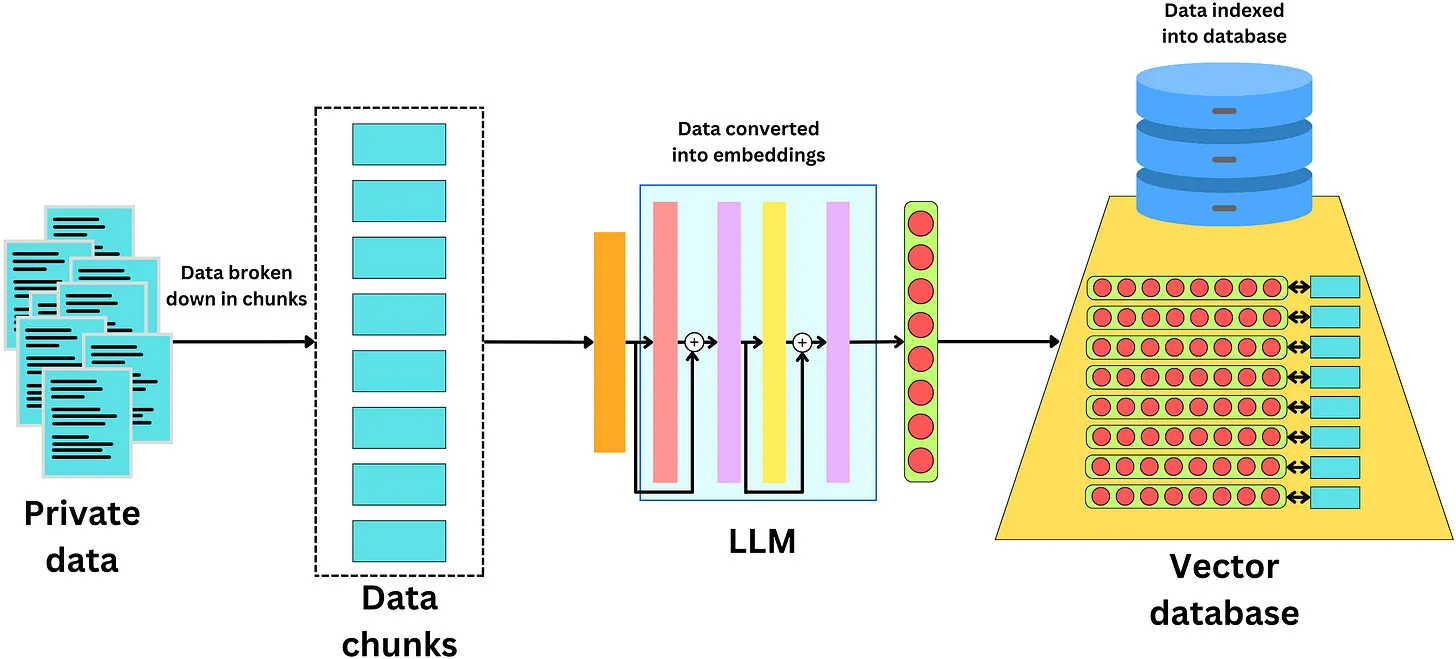

In [34]:
import pinecone

/opt/homebrew/Caskroom/miniconda/base/envs/learning_langchain/lib/python3.11/site-packages/pinecone/index.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [35]:
pinecone.init(
    api_key=os.environ.get("PINECONE_API_KEY"),
    environment=os.environ.get("PINECONE_ENV")
)

In [36]:
pinecone.info.version()

VersionResponse(server='2.0.11', client='2.2.2')

<h5>Indexing

In [37]:
pinecone.list_indexes()

[]

In [71]:
index_name = "langchain-pinecone-learning"

In [39]:
# Deleting an index

def delete_index(index_name):
    if index_name in pinecone.list_indexes():
        print(f"Deleting index {index_name}...")
        pinecone.delete_index(index_name)
        print("Done")
    else:
        print(f"Index {index_name} does not exist")

In [40]:
delete_index(index_name)

Index langchain-pinecone-learning does not exist


In [41]:
# Creating an index

def create_index(index_name):
    if index_name not in pinecone.list_indexes():
        print(f"Creating index {index_name}...")
        pinecone.create_index(index_name, dimension=1536, metric="cosine", pods=1, pod_type="p1.x2") # 1536 is the dimension of OpenAI's embeddings
        print("Done")
    else:
        print(f"Index {index_name} already exists")

In [42]:
create_index(index_name)

Creating index langchain-pinecone-learning...
Done


In [43]:
pinecone.describe_index(index_name)

IndexDescription(name='langchain-pinecone-learning', metric='cosine', replicas=1, dimension=1536.0, shards=1, pods=1, pod_type='p1', status={'ready': True, 'state': 'Ready'}, metadata_config=None, source_collection='')

In [44]:
index = pinecone.Index(index_name)

In [47]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

<h5>Namespaces

- Namespaces are subsets of your data
- Queries are then limiited to specific namespaces
- Indexes are made of namespaces are made of vectors
- Default namespace is ""

In [48]:
import random

vectors = [[random.random() for _ in range(1536)] for _ in range(5)]
ids = list("abcde")

In [49]:
index.upsert(vectors=zip(ids, vectors)) # Creating vectors or updating if it already exists

{'upserted_count': 5}

In [50]:
index.upsert(vectors=[('c', [0.3] * 1536)]) # Updating a vector

{'upserted_count': 1}

In [51]:
index.fetch(ids=["c", "d"]) # Getting vectors

{'namespace': '',
 'vectors': {'c': {'id': 'c',
                   'values': [0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
                              0.3,
       

In [52]:
index.delete(ids=["b", "c"]) # Delete vectors

{}

In [53]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 3}},
 'total_vector_count': 3}

In [54]:
index.delete(delete_all=True) # Delete all vectors

{}

In [55]:
index.upsert(vectors=zip(ids, vectors))

{'upserted_count': 5}

In [56]:
queries = [[random.random() for _ in range(1536)] for _ in range(2)]

In [57]:
index.query( # Querying
    queries=queries,
    top_k=3,
    include_values=False
)

{'results': [{'matches': [{'id': 'd', 'score': 0.753326952, 'values': []},
                          {'id': 'a', 'score': 0.747802377, 'values': []},
                          {'id': 'c', 'score': 0.744188368, 'values': []}],
              'namespace': ''},
             {'matches': [{'id': 'e', 'score': 0.758490443, 'values': []},
                          {'id': 'd', 'score': 0.755446613, 'values': []},
                          {'id': 'b', 'score': 0.751652956, 'values': []}],
              'namespace': ''}]}

<h4>Splitting and Embedding Text Using LangChain and Indexing in Pinecone

- As a rule of thumb, if a chunk of text makes sense without the surrounding context to a human, it will more likely than not also make sense to a chatbot

In [71]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [72]:
text_splitter = RecursiveCharacterTextSplitter( # Default behaviour is to split on \\, \n, and whitespace
    chunk_size=100, # How long a chunk of data is
    chunk_overlap=20, # How long should the overlap be between two chunks
    length_function=len # How do we calculate the length of a chunk
)

In [73]:
with open("./data/speech.txt") as file:
    churchill_speech = file.read()

In [77]:
chunks = text_splitter.create_documents([churchill_speech])

In [79]:
chunks[0]

Document(page_content='Winston Churchill Speech - We Shall Fight on the Beaches\nWe Shall Fight on the Beaches\nJune 4, 1940', metadata={})

In [63]:
len(chunks)

300

In [80]:
def print_embedding_cost(documents):
    import tiktoken
    enc = tiktoken.encoding_for_model("text-embedding-ada-002")
    total_tokens = sum([len(enc.encode(document.page_content)) for document in documents])
    print(f"Total tokens: {total_tokens}")
    print(f"Embedding cost in USD: {total_tokens / 1000 * 0.0004:.6f}")

print_embedding_cost(chunks)

Total tokens: 4820
Embedding cost in USD: 0.001928


In [65]:
from langchain.embeddings import OpenAIEmbeddings

In [66]:
embeddings = OpenAIEmbeddings() # OpenAI has there own model for text embedding called ada. More complex than 1:1 matching of letters and numbers

In [67]:
vector = embeddings.embed_query(chunks[0].page_content)
vector

[-0.044512695492959165,
 -0.03777839841193259,
 -0.0028665412063897363,
 -0.008035243036623833,
 0.01573887374962238,
 0.022549697611167985,
 -0.028442209419711498,
 -0.009757080697139993,
 0.001031508381514479,
 0.007206209899254036,
 0.007792910559953471,
 0.032778689729551495,
 0.007410279916987512,
 -0.011759514690247348,
 0.006348479917681573,
 -0.005340885689417976,
 0.013251773871851669,
 -0.0025668138771607566,
 0.013545123736540071,
 -0.011045270326672154,
 -0.008162786739499592,
 -0.026835161929973886,
 0.029615610741110368,
 -0.0037593459623667556,
 -0.014476192115607266,
 -0.018417286853400147,
 0.010898595394327953,
 -0.018659620727054457,
 0.003048290680307837,
 -0.01431038502247199,
 0.0071105523549278744,
 -0.008596434770483592,
 -0.016555151957911022,
 0.005127250522611594,
 -0.018353515467623583,
 -0.023876150630959662,
 -0.022460417298551742,
 -0.00872397847335935,
 0.022562453005910452,
 -0.012773485684559549,
 0.01365991297599599,
 0.004706356489386118,
 0.00875586

In [68]:
from langchain.vectorstores import Pinecone

In [72]:
index.delete(delete_all=True)

{}

<h5>Asking Questions

In [73]:
vector_store = Pinecone.from_documents(chunks, embeddings, index_name=index_name)
query = "Where should we fight?"
result = vector_store.similarity_search(query)

In [74]:
result

[Document(page_content='shall fight on the beaches, we shall fight on the landing grounds, we shall fight in the fields and', metadata={}),
 Document(page_content='front, now on that, fighting', metadata={}),
 Document(page_content='end, we shall fight in France, we shall fight on the seas and oceans, we shall fight with growing', metadata={}),
 Document(page_content='When we consider how much greater would be our advantage in defending the air above this Island', metadata={})]

In [75]:
for r in result:
    print(r.page_content)
    print("-" * 50)

shall fight on the beaches, we shall fight on the landing grounds, we shall fight in the fields and
--------------------------------------------------
front, now on that, fighting
--------------------------------------------------
end, we shall fight in France, we shall fight on the seas and oceans, we shall fight with growing
--------------------------------------------------
When we consider how much greater would be our advantage in defending the air above this Island
--------------------------------------------------


In [76]:
from langchain.chains import RetrievalQA 
from langchain.chat_models import ChatOpenAI

In [77]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=1)

In [78]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 3}) 
# Retrievers are interfaces that return documents given some query
# Documents are Python dictionaries containing the actual text and metadata

In [79]:
chain = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)
# RetrievalQA chains a retriever with a QA model, such as ChatOpenAI
# The chat model is passed the user's question, along with the relevant documents found by the retriever. It uses this to generate an answer

# This is what RetrievalQA with chain_type="stuff" passes to the model. {context} refers to the relevant documents found by the retriever

# Use the following pieces of context to answer the users question. 
# If you don't know the answer, just say that you don't know, don't try to make up an answer.
# ----------------
# {context}

# {question}

In [80]:
query = "Where should we fight?"
answer = chain.run(query)

In [81]:
answer

'We should fight on the beaches, on the landing grounds, in the fields, in France, on the seas and oceans, and continue to fight with growing determination.'

In [82]:
query = "Who was the king of belgium at that time"
answer = chain.run(query)

In [83]:
answer

'The king of Belgium at that time was King Leopold.'

In [84]:
query="What about the French Armies? Say it like a cowboy."
answer = chain.run(query)

In [85]:
answer

"Well partner, the French armies, they were holdin' strong. They had themselves a plan, ya see? They aimed to advance all the way across the Somme with a mighty force to snatch that land away from the enemy. Yeehaw!"

## Document Loaders

### Transform Loaders

- Transform data from one format into LangChain's documents
- Recall that documents are essentially pieces of text. More concretely, they are Python dictionaries with a field containing the text and another containing metadata

In [11]:
def load_document(file_path: str):
    from langchain.document_loaders import PyPDFLoader
    print(f"Loading {file_path}")
    loader = PyPDFLoader(file_path)
    return loader.load()

In [12]:
documents = load_document("./data/us_constitution.pdf") 

Loading ./us_constitution.pdf


In [16]:
for i, document in enumerate(documents):
    if i == 1: print(document.page_content)
    print(document.metadata) # PyPDFLoader converts the PDF into a list of documents, each containing the text of one page

{'source': './us_constitution.pdf', 'page': 0}
C O N S T I T U T I O N O F T H E U N I T E D S T A T E S   
 
 
 
We the People of the United States, in Order to form a 
more perfect Union, establish Justice, insure domestic 
Tranquility, provide for the common defence, promote 
the general  Welfare, and secure the Blessings of Liberty to 
ourselves  and our Posterity,  do ordain  and establish  this 
Constitution for the United States of America  
 
 
Article.   I. 
SECTION.  1 
All legislative Powers herein granted shall be vested in a 
Congress of the United States, which shall consist of a Sen-  
ate and House of Representatives. 
SECTI ON. 2 
The House of Representatives shall be composed of Mem-  
bers chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifi-  
cations requisite for Electors of the most numerous Branch 
of the State Legislature.  
No Person shall be a Representative who shall not have 
attained to the Age

### Dataset/Service Loaders

- Enable you to query data from public/proprietary sources, like Hacker News, Wikipedia, AWS, etc.
- Turn this data into documents

In [19]:
def load_from_wikipedia(query, lang="en", load_max_docs=2):
    from langchain.document_loaders import WikipediaLoader

    loader = WikipediaLoader(query=query, lang=lang, load_max_docs=load_max_docs)
    return loader.load()

In [20]:
documents = load_from_wikipedia("GPT4")

In [22]:
for i, document in enumerate(documents):
    if i == 0: print(document.page_content)
    print(document.metadata) # PyPDFLoader converts the PDF into a list of documents, each containing the text of one page

Generative Pre-trained Transformer 4 (GPT-4) is a multimodal large language model created by OpenAI, and the fourth in its numbered "GPT-n" series of GPT foundation models. It was released on March 14, 2023, and has been made publicly available in a limited form via the chatbot product ChatGPT Plus (a premium version of ChatGPT), and with access to the GPT-4 based version of OpenAI's API being provided via a waitlist. As a transformer based model, GPT-4 was pretrained to predict the next token (using both public data and "data licensed from third-party providers"), and was then fine-tuned with reinforcement learning from human and AI feedback for human alignment and policy compliance.: 2 Observers reported the GPT-4 based version of ChatGPT to be an improvement on the previous (GPT-3.5 based) ChatGPT, with the caveat that GPT-4 retains some of the same problems. Unlike the predecessors, GPT-4 can take images as well as text as input. OpenAI has declined to reveal technical information 